In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [5]:
df['Helpful'] = np.where(df['HelpfulnessDenominator']>0,df['HelpfulnessNumerator']/df['HelpfulnessDenominator'],-1)

In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful'],
      dtype='object')

In [7]:
df['%upvote'] = pd.cut(df['Helpful'],bins=[-1,0,0.2,0.4,0.6,0.8,1],labels=['Empty','0-20%','20-40%','40-60%','60-80%','80-100%'])

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [9]:
df.groupby(['Score','%upvote'])['Id'].count().reset_index()

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


<AxesSubplot:xlabel='None-Score', ylabel='%upvote'>

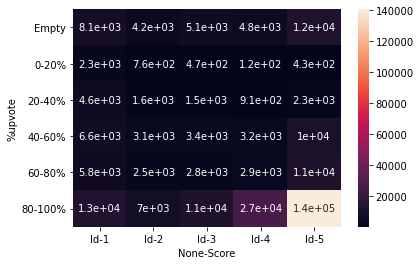

In [10]:
sns.heatmap(df.groupby(['Score','%upvote'])['Id'].count().reset_index().pivot(index='%upvote',columns='Score'),annot=True)

In [11]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [12]:
df2 = df[df['Score']!=3]

In [13]:
X=df2['Text']

In [14]:
df2['Score'].unique()

array([5, 1, 4, 2], dtype=int64)

In [16]:
y_dict = {1:0,2:0,4:1,5:1}
y = df2['Score'].map(y_dict)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
c = CountVectorizer(stop_words="english")

In [20]:
x_c = c.fit_transform(X)

In [21]:
x_c.shape

(525814, 114969)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_c,y,test_size=0.2,random_state=0)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
cls = LogisticRegression()

In [27]:
log = cls.fit(x_train,y_train)

C:\Users\Manav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
log.score(x_test,y_test)

0.936241834105151

In [30]:
w=c.get_feature_names()

In [32]:
coef = log.coef_.tolist()[0]

In [39]:
coef_df=pd.DataFrame({'Word':w,'Coefficient' : coef})

In [43]:
coef_df=coef_df.sort_values(by=['Coefficient','Word'],ascending=False)

In [44]:
coef_df.head(20)

,Word,Coefficient
80600,pleasantly,3.957999
39072,downside,3.129101
5865,addicting,2.838977
94667,skeptical,2.492805
39214,drawback,2.426688
87967,resist,2.307212
111911,whim,2.191311
40342,economical,2.149775
55029,hooked,2.144360
111520,welcome,2.106563


In [45]:
coef_df.tail(20)

,Word,Coefficient
89868,ruins,-2.215960
107494,unfinished,-2.228863
65064,lousy,-2.242692
76576,overpowers,-2.266797
106940,unbearable,-2.278342
62401,lacked,-2.280610
37563,disappointment,-2.297094
106894,unappealing,-2.350869
35220,defeats,-2.388226
37528,disapointed,-2.527678


In [66]:
def text_fit(x,y,nlp_model,ml_model,coef_show=1):
    x_c = nlp_model.fit_transform(x)
    print('features:{}'.format(x_c.shape[1]))
    x_train,x_test,y_train,y_test = train_test_split(x_c,y,test_size=0.2,random_state=0)
    ml = ml_model.fit(x_train,y_train)
    acc = ml.score(x_test,y_test)
    print(acc)
    
    if coef_show==1:
        w=c.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coef_df=pd.DataFrame({'Word':w,'Coefficient' : coef})
        coef_df=coef_df.sort_values(by=['Coefficient','Word'],ascending=False)
        print('\n\n')
        print('Top 20 words : ')
        print('\n')
        print(coef_df.head(20))
        print('\n\n')
        print('Bottom 20 words : ')
        print('\n')
        print(coef_df.tail(20))
        

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
c = CountVectorizer(stop_words='english')

In [56]:
text_fit(X,y,c,LogisticRegression())

features:114969


C:\Users\Manav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.936241834105151



Top 20 words : 


              Word  Coefficient
80600   pleasantly     3.957999
39072     downside     3.129101
5865     addicting     2.838977
94667    skeptical     2.492805
39214     drawback     2.426688
87967       resist     2.307212
111911        whim     2.191311
40342   economical     2.149775
55029       hooked     2.144360
111520     welcome     2.106563
96353     soothing     2.048354
40135      easiest     2.026635
43222    excellent     1.995049
35691    delighted     1.966408
10992      awesome     1.870217
35726       delish     1.853122
113138     worries     1.846570
113837         yay     1.844956
78889      perfect     1.841579
58320       intend     1.829928



Bottom 20 words : 


                  Word  Coefficient
89868            ruins    -2.215960
107494      unfinished    -2.228863
65064            lousy    -2.242692
76576       overpowers    -2.266797
106940      unbearable    -2.278342
62401           lacked    -2.280610
37563   disap

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [58]:
def predict(x,y,nlp_model,ml_model):
    x_c = nlp_model.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(x_c,y,test_size=0.2,random_state=0)
    ml = ml_model.fit(x_train,y_train)
    predictions = ml.predict(x_test)
    print(confusion_matrix(predictions,y_test))
    print(accuracy_score(predictions,y_test))

In [60]:
predict(X,y,CountVectorizer(),LogisticRegression())

C:\Users\Manav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[12199  2180]
 [ 4250 86534]]
0.9388568222663864


In [61]:
from sklearn.dummy import DummyClassifier

In [67]:
text_fit(X,y,CountVectorizer(),DummyClassifier(),0)

features:115282
0.7357150328537604


C:\Users\Manav\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
tfidf=TfidfVectorizer(stop_words='english')

In [70]:
text_fit(X,y,tfidf,LogisticRegression(),0)

features:114969
0.9353574926542605


C:\Users\Manav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
predict(X,y,CountVectorizer(),LogisticRegression())

C:\Users\Manav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[12199  2180]
 [ 4250 86534]]
0.9388568222663864


In [75]:
predict(X,y,tfidf,LogisticRegression())

C:\Users\Manav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[11482  1831]
 [ 4967 86883]]
0.9353574926542605
